<b>Hola Roberto</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

# Análisis exploratorio de datos (Python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import random
from scipy import stats
from scipy.stats import ttest_ind



In [2]:
file1 = "/datasets/project_sql_result_01.csv"
file2 = "/datasets/project_sql_result_04.csv"

In [3]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
df2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


<div class="alert alert-block alert-success">
<b>Celdas [1–7]</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Roberto! Realizaste una carga y exploración inicial adecuada de los datos. Verificaste correctamente los tipos de datos y estructuras, asegurando una base sólida para el análisis posterior.
</div>


LOs dato tienen caractaristicas correctas 

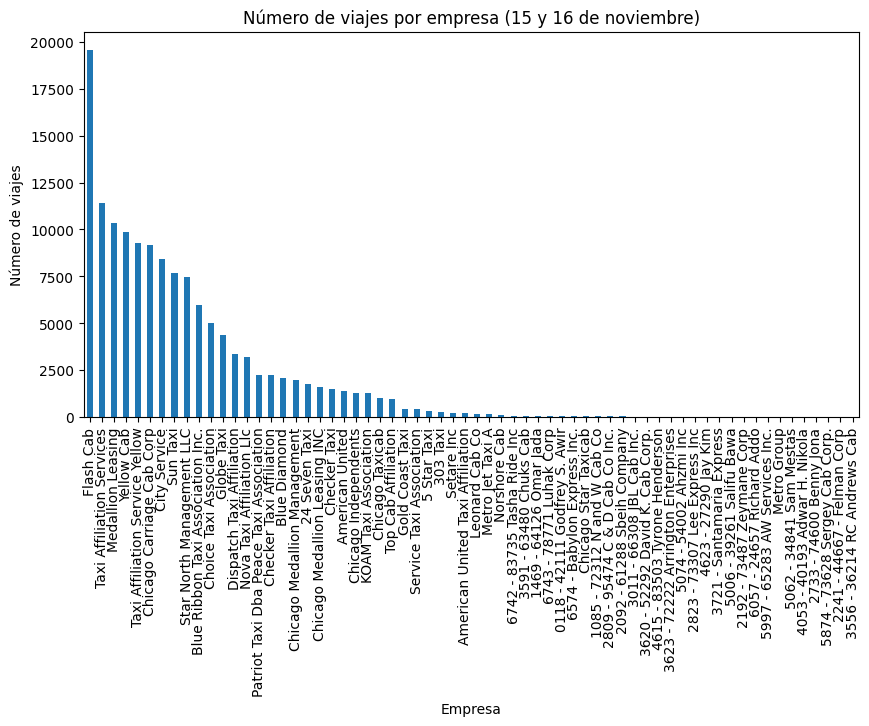

In [8]:
#Investiga cuáles empresas tienen más o menos viajes el 15 y 16 de noviembre de 2017. 

df1.sort_values('trips_amount', ascending=False).plot(
    x='company_name', y='trips_amount', kind='bar', figsize=(10, 5), legend=None
)
plt.title("Número de viajes por empresa (15 y 16 de noviembre)")
plt.xlabel("Empresa")
plt.ylabel("Número de viajes")
plt.show()

En este grafico podemos determina que para el 15 y 16 de noviembre la empresa con mayor vieajes es Flsh Cab superando por mucho a la mas cercana que es Taxi Affliation Services 
Las empresas con el mayor número de viajes claramente destacan en el gráfico. Esto sugiere que algunas compañías tienen una fuerte posición dominante en el mercado, probablemente debido a su alcance, reputación o tarifas competitivas.
Por otro lado, las empresas con menor cantidad de viajes pueden representar actores más pequeños en la industria, quizá con menor presencia o menos vehículos disponibles durante ese período.
Si hay una gran disparidad entre las empresas con más viajes y las demás, podría ser un indicador de que el mercado está centralizado en unas pocas compañías principales.


In [9]:
#identificar los 10 principales barrios en términos de finalización del recorrido
# Ordenar los datos y seleccionar los 10 primeros
top_10_barrios = df2.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los resultados
print(top_10_barrios)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


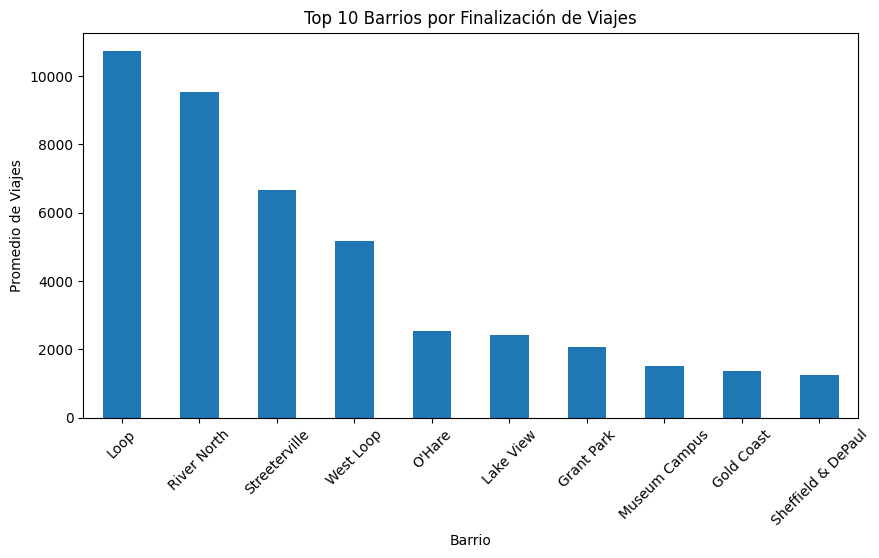

In [10]:
# Ordenar los barrios por promedio de viajes y seleccionar los 10 principales
top_10_barrios = df2.sort_values(by='average_trips', ascending=False).head(10)

# Crear el gráfico de barras
top_10_barrios.plot(
    x='dropoff_location_name', 
    y='average_trips', 
    kind='bar', 
    figsize=(10, 5), 
    legend=None
)
plt.title("Top 10 Barrios por Finalización de Viajes")
plt.xlabel("Barrio")
plt.ylabel("Promedio de Viajes")
plt.xticks(rotation=45)  # Rotar etiquetas para mayor claridad
plt.show()

<div class="alert alert-block alert-success">
<b>Celdas [8–10]</b> <a class="tocSkip"></a><br>
Excelente forma de presentar los datos de viajes por empresa y por barrio. La generación de gráficos de barras facilita mucho la interpretación de los resultados y tus conclusiones sobre la concentración de viajes son acertadas y bien razonadas.
</div>


EL top de los 10 barrios por finalizacion  de viajes   el principal es Loop con mas de 10000 viajes.
Los barrios en las primeras posiciones del gráfico probablemente representen áreas con alta actividad comercial, residencial o turística. Esto podría ser debido a factores como la presencia de oficinas, restaurantes, atracciones turísticas o alta densidad de población.
Los barrios que están fuera de este top 10 podrían ser zonas menos frecuentadas o menos accesibles para los taxis, lo que podría reflejar una menor demanda en esas áreas.



## Prueba de hipótesis

In [11]:
file_path = "/datasets/project_sql_result_07.csv"
df = pd.read_csv(file_path)

In [12]:
# Convertir el campo start_ts a formato de fecha y hora
df['start_ts'] = pd.to_datetime(df['start_ts'])

In [13]:
# Filtrar sábados lluviosos
sabados_lluviosos = df[
    (df['start_ts'].dt.day_name() == 'Saturday') & 
    (df['weather_conditions'] == 'rain')
]['duration_seconds']

# Filtrar sábados no lluviosos
sabados_no_lluviosos = df[
    (df['start_ts'].dt.day_name() == 'Saturday') & 
    (df['weather_conditions'] != 'rain')
]['duration_seconds']

<div class="alert alert-block alert-success">
<b>Celdas [11–13]</b> <a class="tocSkip"></a><br>
Muy buen planteamiento para preparar los datos de la prueba de hipótesis. Filtraste correctamente los sábados lluviosos y no lluviosos, mostrando un adecuado manejo de fechas y condiciones.
</div>


Prueba de hipótesis (prueba t)

In [14]:
# Realizar la prueba t
t_stat, p_value = ttest_ind(sabados_lluviosos, sabados_no_lluviosos, equal_var=False)

# Nivel de significación
alpha = 0.05

# Interpretación de los resultados
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para concluir que la duración promedio cambia los sábados lluviosos.")

No podemos rechazar la hipótesis nula: No hay evidencia suficiente para concluir que la duración promedio cambia los sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
Aplicaste correctamente la prueba t para comparar medias independientes. La interpretación del p-valor y la conclusión son correctas, siguiendo buenas prácticas de inferencia estadística.
</div>


Hipótesis nula (H₀):

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

Hipótesis alternativa (H₁):

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Explicación de los pasos:
Hipótesis nula y alternativa: Estas se plantean para comparar las duraciones promedio bajo condiciones específicas (lluvia/no lluvia).

Criterio de prueba: Elegimos la prueba t porque se adapta bien a comparaciones de medias en dos grupos independientes. Además, asumimos normalidad en los datos o una muestra suficientemente grande para aplicar esta prueba.

Nivel de significación: Establecer a= 0.05  es estándar en análisis estadístico para equilibrar riesgos de error tipo I y tipo II.


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Buen trabajo, Roberto! Tu proyecto muestra un excelente manejo de datos, generación de visualizaciones y aplicación correcta de pruebas estadísticas. Sigue avanzando con esta calidad, ¡vas muy bien!
</div>
